<a href="https://colab.research.google.com/github/Nathan2605/neuralnetwork/blob/main/Neuronal_Network__dogs_cats2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from keras.models import load_model


from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
# Get all filenames
filenames = os.listdir("train")

In [ ]:
# Create a Dataframe by category
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,cat.6100.jpg,0
1,cat.3766.jpg,0
2,cat.8875.jpg,0
3,dog.1025.jpg,1
4,dog.8211.jpg,1


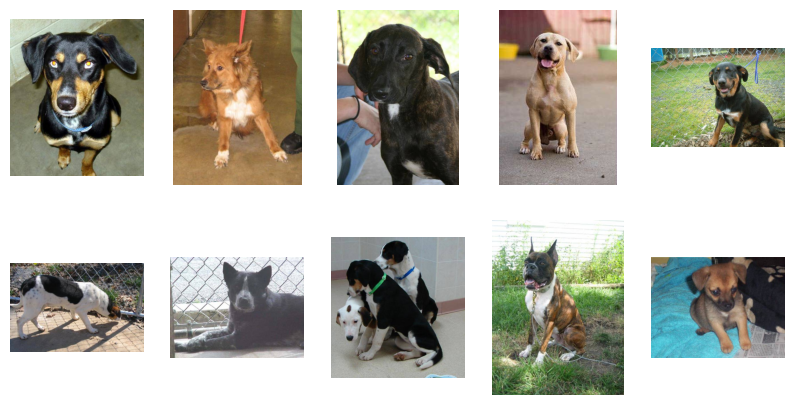

In [ ]:
# Show the first 10 dog images
images_dog = df[df['category'] == 1]['filename'].tolist()
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image_path = os.path.join("train", images_dog[i])  # Construct the full path
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
plt.show()

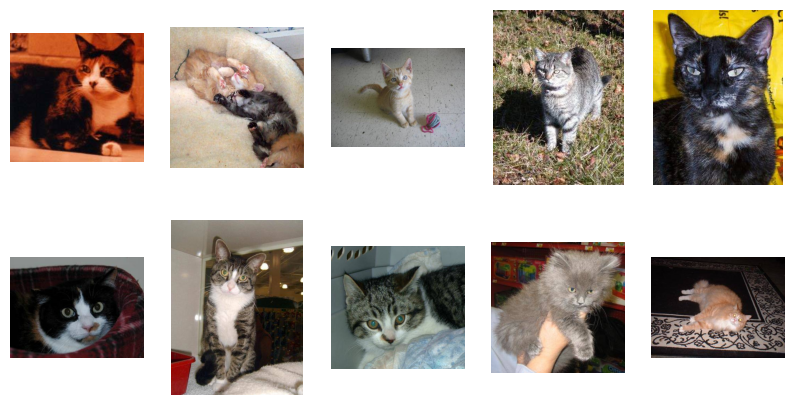

In [ ]:
# Show the first 10 cat images
images_cat = df[df['category'] == 0]['filename'].tolist()
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image_path = os.path.join("train", images_cat[i])  # Construct the full path
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
plt.show()

<Axes: xlabel='category'>

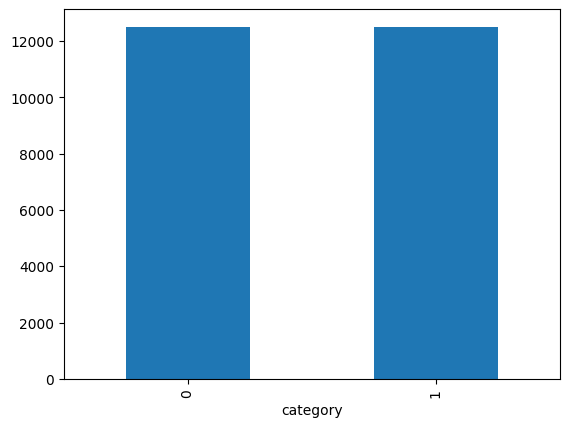

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
# Split data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Settings
train_dir = "train"  # Path to the folder containing all images
image_size = (200, 200)

# Create data generators
datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train data generator
train_data = datagentrain.flow_from_dataframe(
    dataframe=train_df,  # Training data
    directory=train_dir,  # Image directory
    x_col="filename",  # Filenames column
    y_col="category",  # Labels column
    target_size=image_size,  # Resize
    class_mode="raw",  # Raw labels
    batch_size=64,  # Batch size 32
)

# Test data generator
test_data = datagentest.flow_from_dataframe(
    dataframe=test_df,  # Testing data
    directory=train_dir,  # Image directory
    x_col="filename",  # Filenames column
    y_col="category",  # Labels column
    target_size=image_size,  # Resize
    class_mode="raw",  # Raw labels
    batch_size=64,  # Batch size 32
)

Found 20000 validated image filenames.
Found 5000 validated image filenames.


In [ ]:
# Define the neural network model
model = Sequential()

# Convolutional and pooling layers
model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Removed layers:
#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
#model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=512, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Binary classification (cat/dog)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 320000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     163,840,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,101,185 (626.00 MB)

 Trainable params: 164,101,185 (626.00 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=1,
    validation_data=test_data,
)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 15941s 51s/step - accuracy: 0.5158 - loss: 132.4131 - val_accuracy: 0.5978 - val_loss: 0.6697


Tuvimos que reducir el tamano del modelo para poderlo correr, aun asi obtuvimos una precision cercana al 60%.
